# Практическое задание 2

**Правила**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Особенности**
* Рассчитано на **три недели**.
* Состоит из **двух частей**. Обе части **не зависят друг от друга**.
* Задание большое, и сделать его в последний момент не получится. Поэтому сдача происходит *(почти)* **каждую неделю**.
* В вашем решении, которое вы сдаете в определенную неделю, в самом начале ноутбука должно быть указано, что было сделано за эту неделю. При этом за каждую сдачу должно быть сделано не менее 10% задания, иначе будет применен штраф.
* Что означает "*(почти) каждую неделю*": у вас **есть возможность пропустить одну неделю** сдачи из 3, но при условии, что в первую неделю нужно обязательно сдать хотя бы 10 процентов.
* В конце срока сдачи задания вам необходимо предоставить **полностью готовое решение** и отчет о том, что вы сделали **на каждой неделе**. Если не предоставить отчет, проверяющий может оценить объем по каждому дедлайну на свое усмотрение.
* Задание основано на открытых данных. К ним можно найти много ноутбуков с кодом. С ними будет полезно ознакомиться, поучиться чему-то новому, и что-то применить для своего решения. При этом **копирование бОльшей части кода без собственных комментариев и обновления кода будет штрафоваться**.

**Баллы**
* Часть 1 &mdash; 100 баллов
* Часть 2 &mdash; 100 баллов

**Рекомендации по выполнению**
1. Начинайте выполнение задания как можно раньше!
2. "Съешьте на завтрак слона". Задание разделено на несколько независимых частей. Начните выполнение с той части, которая вам кажется наиболее сложной и непонятной.
3. В Kaggle можно работать с ноутбуками и обучать модели. Иногда, возможно, будет удобнее, чем в Google Colab.
4. Для всех задач **рекомендуется** писать **аккуратный код в одном** `.py`-файле и обращаться к нему в jupyter-ноутбуке как-нибудь так: ```from my_super_module import gpt5```. Ноутбук используйте для запуска экспериментов, визуализаций, комментирования результатов и выводов.
5. Скорее всего в процессе выполнения задания вы будете логгировать промежуточные результаты, строить кривые обучения и т.д. Для этого мы рекомендуем присмотреться к инструментам [Weights & Biases](https://wandb.ai/), [Neptune](https://neptune.ai/) и т.п. Многие такие инструменты имеют интеграцию в `transformers`! В случае их использования не забудьте вставить получившиеся графики в ноутбук.
6. Используйте [Trainer](https://huggingface.co/docs/transformers/main_classes/trainer) из `transformers` для обучения моделей. Не стоит строить новый велосипед и снова писать классический цикл обучения, вы уже делали это раньше ;)
7. В процессе обучения не забывайте сохранять промежуточные результаты (чекпоинты моделей). Это удобно делать в google-drive, если пользуетесь Colab.
8. В NLP размер модели, а также количество и качество обучающих данных **имеет значение**. Не стоит брать совсем уж легкие архитектуры. Обучение в задачах скорее всего будет занимать не 5-10 минут, этого не стоит бояться.
9. Разумно подойдите к выбору гиперпараметров, исходя из вычислительных ресурсов. Обратите внимание на [пост](https://huggingface.co/docs/transformers/main/en/perf_train_gpu_one). На последнем занятии были рассмотрены техники, позволяющие обучать быстро даже большие модели на **одном** GPU.
___

## Часть 1.

В этой части задания вы будете работать с данными уже завершившегося [соревнования](https://github.com/dialogue-evaluation/RuSentNE-evaluation) по анализу тональности к именованным сущностям в новостных текстах. Посмотрим на описание, которое представлено в репозитории.

Анализ тональности текста &mdash; извлечение выраженной в тексте эмоциональной оценки к некоторой сущности &mdash; одно из наиболее активно развивающихся направлений в автоматической обработке текстов.

Анализ тональности новостных текстов &mdash; важное направление в области анализа мнений, поскольку обнаружение, отслеживание трендов тональности в новостном потоке важно для построения разного рода аналитических систем, отслеживания имиджа в СМИ конкретных людей или компаний.

Тональность по отношению к сущности в новостном тексте может происходить по крайней мере из трех разных источников:
* мнения автора текста;
* цитируемого мнения, при этом сам носитель мнения может быть упомянут или не упомянут в тексте;
* имплицитного мнения, которое следует из каких-либо упомянутых действий или реакций, например, X уволил Y. Такая информация часто присутствует даже при внешне нейтральном изложении событий.

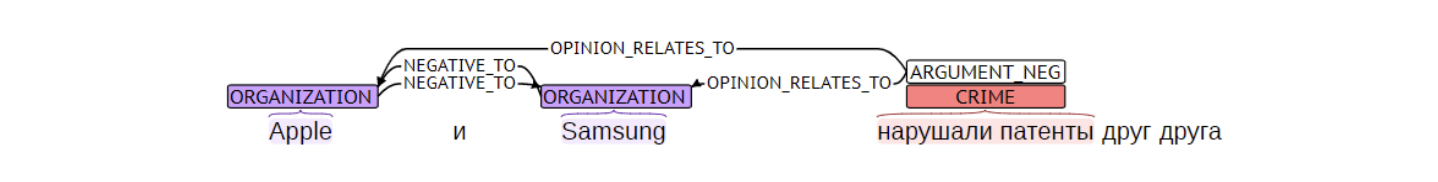

Вам предстоит решить задачу извлечения из новостных текстов тональности трёх классов (негативная, позитивная, нейтральная) по отношению к заранее размеченным сущностям типа `PERSON`, `ORGANIZATION`, `PROFESSION`, `COUNTRY`, `NATIONALITY` в рамках отдельного предложения.

Данные представлены в следующем формате:
* `sentence` &mdash; предложение;
* `entity` &mdash; объект анализа тональности;
* `entity_tag` &mdash; тип сущности, может быть `PERSON`, `ORGANIZATION`, `PROFESSION`, `COUNTRY`, `NATIONALITY`;
* `entity_pos_start_rel` и `entity_pos_end_rel` &mdash; индексы начала и конца упоминания сущности в предложении;
* `label` &mdash; метка тональности (0 &mdash; нейтрально, 1 &mdash; отрицательно, 1 &mdash; положительно).

Основной метрикой соревнования является $F_1-macro$ с **усреднением по двум классам**. Нейтральный класс исключается, т.к. важно выделить именно мнение. Таким образом, процедура оценки следующая:

1. Отдельно вычислить $F_1$ для каждого из классов.
2. Усреднить полученные значения $F_1$ для двух из трех классов.

Предлагается работать с `train` и `dev(val)` выборками. Для начала изучите бейзлайн, используемый авторами. Он содержит реализацию многих вспомогательных вещей, которыми мы на занятиях и в домашних заданиях пользовались через библиотеку `transformers`. Вы можете подчерпнуть некоторые моменты, но полностью копировать код бейзлайна **запрещается**.

Обучите свое собственное базовое решение и посчитайте качество на валидации. Подумайте, в каком формате лучше подавать на вход модели используемые данные? Вам может потребоваться добавить спец. тоцены в словарь, сделать это можно [так](https://github.com/huggingface/tokenizers/issues/247).

Попробуйте улучшить качество, проведя как минимум **два эксперимента**, в которых вы можете:
* Использовать другую базовую модель;
* Предварительно обучить базовую модель на задачу MLM на имеющимся корпусе текстов;
* Попробовать разные стратегии получения итогового представления и разные форматы входных данных. Например, можно сделать предсказание не из `[CLS]` токена, а из спец. токена (например `[PERSON]`) сущности **или** из вектора, полученного после пуллинга на токенах (например `['В', '##ася', 'П', '##уп', '##кин']`) описания сущности.
В этих случаях вход модели может выглядеть как-то так:
`[CLS] <текст новости> [PERSON] Вася Пупкин [SEP] <продолжение новости> [SEP]`
* Найти статьи, релевантные задаче, а также попробовать реализовать и применить описанные там методы. Можете изучить [статью](https://arxiv.org/pdf/2305.17679.pdf) от авторов соревнования. В этой работе описаны успешные решения победителей. В данном случае разрешается использовать код авторов, если таковой имеется. Свой выбор стоит кратко **обосновать**.

In [246]:
import numpy as np
import pandas as pd

import chardet
from pathlib import Path
import os

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from transformers import BertTokenizerFast, BertForSequenceClassification, BertForMaskedLM
from transformers import RobertaModel, RobertaPreTrainedModel, RobertaForSequenceClassification, RobertaTokenizerFast, RobertaConfig
from transformers import Trainer, TrainingArguments, EvalPrediction, DataCollatorForLanguageModeling
from transformers.modeling_outputs import SequenceClassifierOutput

from datasets import Dataset, DatasetDict

## Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
with open("/content/drive/MyDrive/train_data.csv", "rb") as f:
    result = chardet.detect(f.read(10000))  # анализируем первые 10Кб

print(result['encoding'])

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/train_data.csv", encoding='utf-8', delimiter="\t")
train_data["label"] += 1
val_data = pd.read_csv("/content/drive/MyDrive/validation_data_labeled.csv", encoding='utf-8', delimiter="\t")
val_data["label"] += 1
train_data.head()

## Kaggle

In [5]:
with open("/kaggle/input/entity-sentiment-analysis-data/train_data.csv", "rb") as f:
    result = chardet.detect(f.read(10000))  # анализируем первые 10Кб

print(result['encoding'])

utf-8


In [6]:
train_data = pd.read_csv("/kaggle/input/entity-sentiment-analysis-data/train_data.csv", encoding='utf-8', delimiter="\t")
train_data["label"] += 1
val_data = pd.read_csv("/kaggle/input/entity-sentiment-analysis-data/validation_data_labeled.csv", encoding='utf-8', delimiter="\t")
val_data["label"] += 1
train_data.head()

,sentence,entity,entity_tag,entity_pos_start_rel,entity_pos_end_rel,label
0,"Джеймс «Бадди» Макгирт (James (Buddy) McGirt, ...",спортсмена,PROFESSION,86,96,1
1,«За всю нашу долгую карьеру нам довелось играт...,музыкантов,PROFESSION,258,268,1
2,"Ранее, 7 декабря, толпа болельщиков перекрыла ...",Егоре Свиридове,PERSON,175,190,1
3,"В субботу, 21 июля 2018 года, на арене СК «Оли...",россиянина,NATIONALITY,122,132,1
4,Представитель талибов Забиулла Муджахид в твит...,американских захватчика,PROFESSION,109,132,0


### <font color="green" size=5>=====Неделя 1=====</font>

Сначала проанализируем кодировку файла

In [7]:
train_data.loc[24, "sentence"]

'Лауреатами в области физики стали бельгийский учёный Франсуа Энглер и британский профессор Питер Хиггс «за теоретическое открытие механизма, который позволяет лучше понять возникновение массы субатомных частиц».'

In [8]:
train_data["entity_tag"].unique(), len(train_data), len(val_data)

(array(['PROFESSION', 'PERSON', 'NATIONALITY', 'COUNTRY', 'ORGANIZATION'],
       dtype=object),
 6637,
 2845)

Как мы видим, в данных содержится пять разных тегов, в трейне 6637 строк, в валидации - 2845. Попробуем обучить на этих данных бейзлайн из репозитория. Для начала выясним, что сделали авторы:

* Написали собственные оптимайзеры с warmup для стабильности работы модели;
* Написали собственный BERT Config;
* Написали токенизацию и все связанные с ней функции (load_vocab, convert_tokens_to_ids, whitespace_tokenize, и т.п.);
* Написали собственные класс токенизатора, FullTokenizer, объединяющий BasicTokenizer и WordPieceTokenizer;
* Написали обработку данных;
* Добавили добавление CLS и SEP токенов;
* Использовали RuBERT-Base-Uncased;
То есть, это обучение BERT на токенизированном тексте. Повтороим то же самое. Перед токенизацией посмотрим на распределение длин предложений в тексте

In [9]:
train_data.loc[:, "sentence"].apply(len)

0       137
1       277
2       212
3       375
4       175
       ... 
6632    109
6633     94
6634    121
6635     72
6636    211
Name: sentence, Length: 6637, dtype: int64

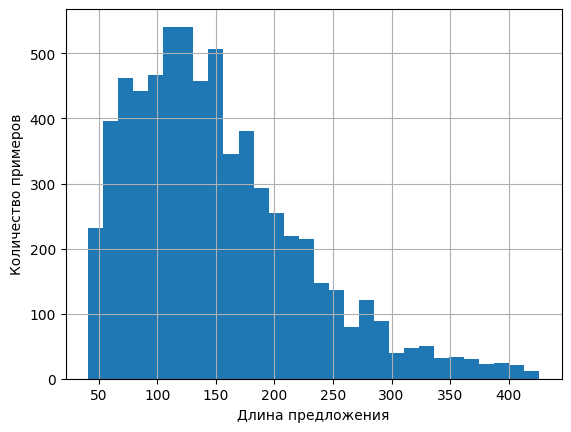

In [10]:
plt.hist(train_data.loc[:, "sentence"].apply(len), bins=30)

plt.xlabel("Длина предложения")
plt.ylabel("Количество примеров")

plt.grid(True)
plt.show()

Можем без серьезных потерь ограничить предложения 384 токенами

In [11]:
def basic_preprocessing(row):
    return row["sentence"]

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, data, tokenizer, max_length=384, preprocessing_row=basic_preprocessing):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.preprocessing_row = preprocessing_row

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        encoding = self.tokenizer(
            self.preprocessing_row(row),
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
            add_special_tokens=True
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": torch.tensor(row["label"].astype(int), dtype=torch.long)
        }

tokenizer = BertTokenizerFast.from_pretrained("DeepPavlov/rubert-base-cased")
train_dataset = CustomDataset(train_data, tokenizer)
val_dataset = CustomDataset(val_data, tokenizer)

tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.65M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

In [82]:
def compute_metrics(p: EvalPrediction):
    logits, label_ids = p

    predictions = logits.argmax(-1)
    y_pred = predictions
    y_true = label_ids

    f1_0 = f1_score(y_true == 0, y_pred == 0)
    f1_2 = f1_score(y_true == 2, y_pred == 2)

    f1_avg = (f1_0 + f1_2) / 2

    return {
        "f1_-1": float(f1_0),
        "f1_1": float(f1_2),
        "f1_macro_-1_1": float(f1_avg)
    }

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased", num_labels=3
)

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=5e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.1,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Тут я случайно затер информацию об обучении, поэтому вставил информацию из другого ноутбука:

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

 [1040/1040 45:28, Epoch 5/5]
Epoch	Training Loss	Validation Loss	F1 0	F1 2	F1 Macro 0 2

1	No log	0.678937	0.163569	0.103093	0.133331

2	No log	0.642900	0.271722	0.301653	0.286687

3	0.687600	0.637045	0.355014	0.367776	0.361395

4	0.687600	0.629835	0.386139	0.366667	0.376403

5	0.566100	0.631835	0.400978	0.370642	0.385810

TrainOutput(global_step=1040, training_loss=0.6220691717587985, metrics={'train_runtime': 2730.4499, 'train_samples_per_second': 12.154, 'train_steps_per_second': 0.381, 'total_flos': 6548564075477760.0, 'train_loss': 0.6220691717587985, 'epoch': 5.0})

Получили бейзлайн, который мы будем улучшать, применяя разные техники

In [ ]:
model_save_path = "./trained_rubert"
tokenizer.save_pretrained(model_save_path)
model.save_pretrained(model_save_path)

### <font color="yellow" size=5>=====Неделя 2=====</font>

Чилл-неделя

### <font color="red" size=5>=====Неделя 3=====</font>

Теперь применим несколько подходов для повышения качества предсказаний

#### Добавление информации о сущности

Одной из главных причин, по которой модель очень плохо классифицирует тональность по отношению к объекту - отсутствие информации, по какому объекту анализировать тональность. Сначала попробуем добавить эту информацию самым простым образом - добавить в конце текста вопрос для модели.

In [13]:
def entity_processing(row):
    sentence = row["sentence"]
    entity = row["entity"]
    entity_tag = row["entity_tag"]
    return f"{sentence} Что ты думаешь о тональности текста по отношению к сущности: {entity}? Тег сущности: {entity_tag}."

In [14]:
# Увеличиваем максимальную длину, чтобы вопрос для всех строк вместился
train_dataset = CustomDataset(train_data, tokenizer, max_length=448, preprocessing_row=entity_processing)
val_dataset = CustomDataset(val_data, tokenizer, max_length=448, preprocessing_row=entity_processing)

Также добавим к модели warmup в течение половины эпохи, чтобы модель хорошо адаптировалась к новой для себя задаче, и немного поднимем lr

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased", num_labels=3
)

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=15e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=4,
    weight_decay=0.1,
    warmup_steps=100
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1 -1,F1 1,F1 Macro -1 1
1,No log,0.647380,0.372493,0.051546,0.212020
2,No log,0.533196,0.607375,0.464345,0.535860
3,0.631300,0.535365,0.612868,0.535316,0.574092
4,0.631300,0.536771,0.629744,0.540390,0.585067


TrainOutput(global_step=832, training_loss=0.5286702742943397, metrics={'train_runtime': 2411.406, 'train_samples_per_second': 11.009, 'train_steps_per_second': 0.345, 'total_flos': 6111993137112576.0, 'train_loss': 0.5286702742943397, 'epoch': 4.0})

Доучим модель еще на двух эпохах, так как видим, что метрика $F_1$ не закончила повышаться

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=15e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=2,
    weight_decay=0.1,
    warmup_steps=100
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,F1 -1,F1 1,F1 Macro -1 1
1,No log,0.616044,0.628458,0.526462,0.577460
2,No log,0.704431,0.643216,0.557419,0.600318


TrainOutput(global_step=416, training_loss=0.23906086041377142, metrics={'train_runtime': 1215.1156, 'train_samples_per_second': 10.924, 'train_steps_per_second': 0.342, 'total_flos': 3055996568556288.0, 'train_loss': 0.23906086041377142, 'epoch': 2.0})

Удалось добиться $0.6 F_1$ score, попробуем еще улучшиться

#### MLM-training

Теперь дополнительно дообучим нашу модель предварительно на задаче Masked Language Modeling, для этого сначала обучим BertForMaskedLM, а на его основе обучим BertForSequenceClassifying

In [ ]:
train_concatenated = [entity_processing(row) for _, row in train_data.iterrows()]
val_concatenated = [entity_processing(row) for _, row in val_data.iterrows()]

In [ ]:
dataset = Dataset.from_dict({"text": train_concatenated})

def tokenize_function(examples):
    return tokenizer(
        examples["text"],
        padding="max_length",
        truncation=True,
        max_length=448,
        return_special_tokens_mask=True
    )

tokenized_dataset = dataset.map(tokenize_function, batched=True, remove_columns=["text"])

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer,
    mlm=True,
    mlm_probability=0.15
)

model = BertForMaskedLM.from_pretrained("DeepPavlov/rubert-base-cased")

training_args = TrainingArguments(
    output_dir="./rubert_mlm",
    overwrite_output_dir=True,
    num_train_epochs=2,
    per_device_train_batch_size=8,
    save_steps=200,
    save_strategy="steps",
    learning_rate=15e-6,
    weight_decay=0.1,
    report_to="none",
    bf16=True
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    data_collator=data_collator,
)

trainer.train()

Map:   0%|          | 0/6637 [00:00<?, ? examples/s]

Step,Training Loss
500,1.046500
1000,0.895300
1500,0.800900


OutOfMemoryError: CUDA out of memory. Tried to allocate 1.60 GiB. GPU 0 has a total capacity of 14.74 GiB of which 912.12 MiB is free. Process 26862 has 13.85 GiB memory in use. Of the allocated memory 12.55 GiB is allocated by PyTorch, and 1.17 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "/content/rubert_mlm/checkpoint-1600",
    num_labels=3,
    ignore_mismatched_sizes=True
)

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=15e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.1,
    warmup_steps=100,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /content/rubert_mlm/checkpoint-1600 and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1 -1,F1 1,F1 Macro -1 1
1,No log,0.601544,0.452933,0.154229,0.303581
2,No log,0.509939,0.596659,0.515837,0.556248
3,0.614200,0.516676,0.638202,0.566392,0.602297
4,0.614200,0.503263,0.661702,0.590909,0.626306
5,0.302800,0.540932,0.652031,0.570136,0.611083


TrainOutput(global_step=1040, training_loss=0.4482341184065892, metrics={'train_runtime': 3082.529, 'train_samples_per_second': 10.766, 'train_steps_per_second': 0.337, 'total_flos': 7639991421390720.0, 'train_loss': 0.4482341184065892, 'epoch': 5.0})

Итого мы смогли добиться $0.626F_1$-score

#### Другая модель

Используем для классификации ,более мощную русскоязычную модель -
ai-forever/sbert_large_nlu_ru. По количеству параметров она больше предыдущей в порядка 2.5 раза, у нее 24 скрытых слоя вместо 12 и 16 голов вместо 12. В теории она может выделять более сложные признаки, попробуем ее в деле

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "ai-forever/sbert_large_nlu_ru",
    num_labels=3
)

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=15e-6,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=6,
    warmup_steps=200,
    num_train_epochs=3,
    weight_decay=0.1,
    bf16=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

config.json:   0%|          | 0.00/863 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ai-forever/sbert_large_nlu_ru and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1 -1,F1 1,F1 Macro -1 1
1,0.787400,0.743363,0.000000,0.027174,0.013587
2,0.697700,0.710778,0.224678,0.270386,0.247532
3,0.494800,0.827085,0.377457,0.366337,0.371897


TrainOutput(global_step=3321, training_loss=0.6575870439253166, metrics={'train_runtime': 9615.0545, 'train_samples_per_second': 2.071, 'train_steps_per_second': 0.345, 'total_flos': 1.6236279562108032e+16, 'train_loss': 0.6575870439253166, 'epoch': 3.0})

Модель обучалась очень долго, но так и не смогла достигнуть оптимальных значений метрики. Попробуем ещё одну модель - ruRoberta-large - она имеет архитектуру, сходную с bert-large, но обучалась только на задаче MLM

In [ ]:
tokenizer = RobertaTokenizerFast.from_pretrained("ai-forever/ruRoberta-large")
train_dataset = CustomDataset(train_data, tokenizer, max_length=448, preprocessing_row=entity_processing)
val_dataset = CustomDataset(val_data, tokenizer, max_length=448, preprocessing_row=entity_processing)

model = RobertaForSequenceClassification.from_pretrained("ai-forever/ruRoberta-large", num_labels=3)

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=15e-6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.01,
    warmup_steps=200,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,F1 -1,F1 1,F1 Macro -1 1
1,0.744500,0.523194,0.626901,0.530220,0.578560
2,0.450300,0.478562,0.673469,0.638418,0.655944
3,0.344400,0.708380,0.710831,0.624553,0.667692
4,0.183700,0.914023,0.706783,0.639201,0.672992


TrainOutput(global_step=3320, training_loss=0.4082919051848262, metrics={'train_runtime': 8292.3759, 'train_samples_per_second': 3.201, 'train_steps_per_second': 0.4, 'total_flos': 2.1648372749477376e+16, 'train_loss': 0.4082919051848262, 'epoch': 4.0})

Мы получили очень сильное улучшение относительно предыдущих подходов, близкое к top-1 результату в соревновании (0.673 vs 0.681), увеличение размера модели и особое обучение помогли поднять качество

#### Другая модель + другая стратегия предсказания

Так как Roberta-large хорошо себя зарекомендовала в этой задаче, для последнего эксперимента будем использовать её. Теперь мы поменяем способ совершения предсказания, а именно, мы будем делать предсказания по специальному токену, который мы будем добавлять перед сущностью. В таком случае отсутствует необходимость в вопросе, который мы задавали в конце, его мы уберем. Также добавим веса классам, чтобы привлекать внимание модели к более редким позитивным и негативным объявлениям. В остальном, кроме нового преобразования текста, весь пайплан обучения остается прежним, только валидацию будем проводить чаще

In [31]:
def prepare_text_with_tag(row):
    sentence = row["sentence"]
    entity = row["entity"]
    entity_tag = row["entity_tag"]
    start_pos = row["entity_pos_start_rel"]
    end_pos = row["entity_pos_end_rel"]

    # Вставляем токен перед сущностью
    new_sentence = (
        sentence[:start_pos] + f"[{entity_tag}_START] {entity} [{entity_tag}_END] "  + sentence[end_pos:]
    )
    return new_sentence

In [81]:
class RobertaWithAspect(RobertaPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.roberta = RobertaModel(config)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

        # Регистрируем буферы для токенов
        self.register_buffer("tag_start_ids", None)
        self.init_weights()

    def set_tag_start_ids(self, tag_start_ids):
        """Установка ID токенов [TAG_START]"""
        self.tag_start_ids = torch.tensor(tag_start_ids, dtype=torch.long, device=self.device)

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
    ):
        outputs = self.roberta(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
            output_attentions=output_attentions,
            output_hidden_states=output_hidden_states,
            return_dict=return_dict,
        )

        # Получаем последний слой эмбеддингов
        sequence_output = outputs.last_hidden_state  # shape: (batch_size, seq_len, hidden_size)

        batch_size, seq_len, hidden_size = sequence_output.shape
        entity_positions = []

        # Обрабатываем каждый батч
        for i in range(batch_size):
            found = False
            for tag_id in self.tag_start_ids:
                positions = (input_ids[i] == tag_id).nonzero(as_tuple=True)
                if len(positions[0]) > 0:
                    # Берём первый найденный токен
                    pos = positions[0][0].item()
                    entity_emb = sequence_output[i, pos].unsqueeze(0)
                    entity_positions.append(entity_emb)
                    found = True
                    break
            if not found:
                # fallback: используем [CLS]
                entity_emb = sequence_output[i, 0].unsqueeze(0)
                entity_positions.append(entity_emb)

        # Собираем все представления
        entity_embeddings = torch.cat(entity_positions, dim=0)  # shape: (batch_size, hidden_size)
        logits = self.classifier(entity_embeddings)

        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))

        return {
            "loss": loss,
            "logits": logits,
        }

In [86]:
tokenizer = RobertaTokenizerFast.from_pretrained("ai-forever/ruRoberta-large")
train_dataset = CustomDataset(train_data, tokenizer, max_length=448, preprocessing_row=prepare_text_with_tag)
val_dataset = CustomDataset(val_data, tokenizer, max_length=448, preprocessing_row=prepare_text_with_tag)

config = RobertaConfig.from_pretrained("ai-forever/ruRoberta-large", num_labels=3)
model = RobertaWithAspect(config)

unique_tags = train_dataset.data["entity_tag"].unique()
special_tokens = []
for tag in unique_tags:
    special_tokens.extend([f"[{tag}_START]", f"[{tag}_END]"])
tokenizer.add_special_tokens({"additional_special_tokens": special_tokens})
model.resize_token_embeddings(len(tokenizer))

all_tag_start_ids = []
for tag in unique_tags:
    tag_start_id = tokenizer.convert_tokens_to_ids(f"[{tag}_START]")
    all_tag_start_ids.append(tag_start_id)

model.set_tag_start_ids(all_tag_start_ids)

Добавим новую функцию compute_metrics, чтобы отслеживать также f1_P,N,0

In [87]:
def compute_metrics(p: EvalPrediction):
    logits, label_ids = p

    predictions = logits.argmax(-1)
    y_pred = predictions
    y_true = label_ids

    f1_0 = f1_score(y_true == 0, y_pred == 0)
    f1_2 = f1_score(y_true == 2, y_pred == 2)

    f1_avg = (f1_0 + f1_2) / 2

    return {
        "f1_N": float(f1_0),
        "f1_P": float(f1_2),
        "f1_macro_P,N": float(f1_avg),
        "f1_macro_P,N,0": float(f1_score(y_true, y_pred, average='macro')),
    }

In [88]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=15e-6,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=4,
    weight_decay=0.01,
    warmup_steps=400,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Exception ignored in: <function _xla_gc_callback at 0x7cc840add3a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1 N,F1 P,"F1 Macro P,n","F1 Macro P,n,0"
1,No log,0.812590,0.000000,0.000000,0.000000,0.278800
2,0.814000,0.766119,0.000000,0.000000,0.000000,0.278800


/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


KeyboardInterrupt: 

Дальше обучать смысла нет, что-то пошло не так

## Часть 2.

Современные виртуальные ассистенты &mdash; это сложные системы, состоящие на самом деле из большого количества моделей. Так, например, если мы говорим о голосовых ассистентах, то после запроса пользователя могут решаться следующие задачи:
* распознавание речи,
* предобработка текста,
* распознавание именованных сущностей, намерения пользователя,
* переход в другой навык (сервис), переключение на другую модель.

В этой задаче мы будем пытаться построить свою небольшую модель для распознавания намерения пользователя. Предположим, что в нашего бота Физтех.Статистики мы думаем добавить функциональности. Для каждого запроса на **естественном языке** мы хотим понять намерение пользователя, чтобы связать этот запрос с имеющимися сценариями. Например по запросам "когда дедлайны", "когда следующая лекция", "кому писать с вопросом по большой домашке" мы бы переключались на заготовленный сценарий взаимодействия без необходимости подключения преподавателя. Таким образом, наш роутинг запроса на самом деле сводится к задаче классификации текста, но с некоторыми особенностями. Обычно таких сервисов и сценариев много, при этом к уже имеющимся с течением времени добавляются новые. Возникает необходимость уметь быстро дообучать модель, добавляя новые классы, но и делать это так, чтобы качество для старых оставалось приемлемым.



![intent](https://f.hubspotusercontent20.net/hubfs/2734675/Intent-Classification-blog-images.jpg)

Будем работать с [данными](https://www.kaggle.com/datasets/constantinwerner/qa-intents-dataset-university-domain), которые собраны Новосибирским Государственным Университетом для своего QA-чатбота. Выбор в большой степени обусловлен именно "студенческим доменом". Описание гласит, что датасет содержит 142 интента (класса) и порядка 50-220 фраз на русском языке для каждого.

   0. Проведите небольшую аналитику имеющихся данных. Какой размер датасета? Сколько в среднем у нас имеется примеров на класс?  Что можно сказать насчет длины текстов, с которыми придется работать? С какими запросами приходится иметь дело?

   1. Для начала обучите какую-нибудь модель на основе архитектуры трансформер (например BERT-based модель для русского языка) целиком на исходном датасете. Не забудьте про валидацию. Измерьте качество на тестовой выборке. В качестве целевой метрики используйте точность.

   2. Далее попробуем имитировать следующий сетап. Предположим, что сначала у нас имеется 122 класса, к которым в течение времени планируется добавить еще 20 (а потом может быть еще). Выделите начальные 122 класса и обучите сначала модель на них. Посчитайте точность на тесте. Теперь, когда нам потребуется добавить новые интенты, нам бы не хотелось обучать модель заново, так как это может занять много времени, делать это придется довольно часто, а научиться поддерживать новые сценарии хотелось бы быстро. Мы поступим следующим образом:
       * Будем обучать только слой для классификации. При добавлении новых классов к нему добавляются лишь новые случайно инициализированные строки(столбцы), большой трансформер при этом остается замороженным.
       * Для еще большего ускорения процесса дообучения данные, которые соответствуют "первым" 122 классам можно предварительно пропустить через трансформер, а полученные скрытые состояния сохранить на диск. Таким образом, при появлении новых интентов и данных к ним через замороженный трансформер потребуется прогнать лишь новые тексты.
       * Проведите процесс дообучения на данных, соответствующим всем 142 классам, с учетом вышеизложенных предложений.
       * Сравните получившуюся модель на тестовой выборки с моделью из первого пункта.
    
4. Проведите **один** эксперимент, в котором вы можете:
    * Поэкспериментировать с разными головами для классификации (линейный слой, двухслойный MLP) и пуллингами (`[CLS]`, Mean-pooling).
    * Провести агументации запросов с использованием [augmentex](https://github.com/ai-forever/augmentex). Какие из агументаций наиболее полезны для нашего случая?

5. Сравните результаты с точки зрения значения целевой метрики, а также эффективности по времени обучения и дообучения для разных подходов. Какие плюсы и минусы описанного в втором пункте метода? Какие улучшения вы можете предложить? Попробуйте найти, например, релевантные статьи или блог-посты.

### <font color="red" size=5>=====Неделя 3=====</font>

#### 0. Аналитика данных

In [94]:
for elem in os.walk("/kaggle/input/"):
    print(elem)

('/kaggle/input/', ['entity-sentiment-analysis-data', 'qa-intents-dataset-university-domain'], [])
('/kaggle/input/entity-sentiment-analysis-data', [], ['validation_data_labeled.csv', 'train_data.csv'])
('/kaggle/input/qa-intents-dataset-university-domain', [], ['dataset_test.tsv', 'labels_description.txt', 'dataset_train.tsv'])


In [115]:
train=pd.read_csv('/kaggle/input/qa-intents-dataset-university-domain/dataset_train.tsv',sep='\t', header=None)
test=pd.read_csv('/kaggle/input/qa-intents-dataset-university-domain/dataset_test.tsv',sep='\t', header=None)
with open("/kaggle/input/qa-intents-dataset-university-domain/labels_description.txt", "r") as f:
    label_descriptions = f.readlines()

In [118]:
len(train), len(test), len(np.unique(train[1]))

(13230, 883, 142)

Видим, что у нас есть 13230 записей в трейне, 883 строки в тесте и 142 уникальных тега. Для удобной визуализации нарисуем гистограмму количеств уникальных значений тегов

(array([52., 31., 25.,  4., 11.,  7.,  3.,  3.,  1.,  2.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.]),
 array([  20.  ,   47.25,   74.5 ,  101.75,  129.  ,  156.25,  183.5 ,
         210.75,  238.  ,  265.25,  292.5 ,  319.75,  347.  ,  374.25,
         401.5 ,  428.75,  456.  ,  483.25,  510.5 ,  537.75,  565.  ,
         592.25,  619.5 ,  646.75,  674.  ,  701.25,  728.5 ,  755.75,
         783.  ,  810.25,  837.5 ,  864.75,  892.  ,  919.25,  946.5 ,
         973.75, 1001.  , 1028.25, 1055.5 , 1082.75, 1110.  ]),
 <BarContainer object of 40 artists>)

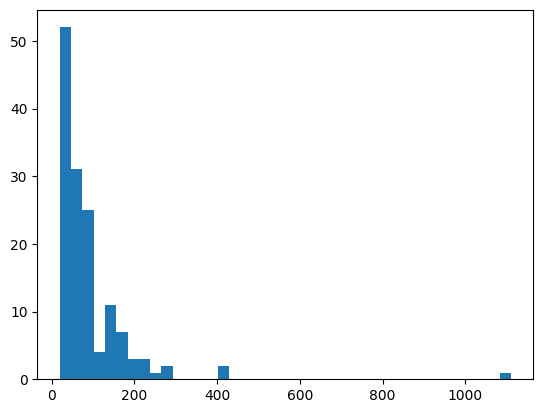

In [121]:
plt.hist(train[1].value_counts(), bins=40)

Видим, что есть один класс с более, чем 1000 уникальных примеров и класс с 400 уникальными примерами. Рассмотрим детальнее остальные классы

(array([15., 14.,  5., 12., 13.,  8.,  6.,  9.,  3.,  3.,  3., 17.,  1.,
         2.,  0.,  1.,  2.,  2.,  2.,  4.,  1.,  2.,  2.,  0.,  3.,  1.,
         1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,
         1.]),
 array([ 20.   ,  26.675,  33.35 ,  40.025,  46.7  ,  53.375,  60.05 ,
         66.725,  73.4  ,  80.075,  86.75 ,  93.425, 100.1  , 106.775,
        113.45 , 120.125, 126.8  , 133.475, 140.15 , 146.825, 153.5  ,
        160.175, 166.85 , 173.525, 180.2  , 186.875, 193.55 , 200.225,
        206.9  , 213.575, 220.25 , 226.925, 233.6  , 240.275, 246.95 ,
        253.625, 260.3  , 266.975, 273.65 , 280.325, 287.   ]),
 <BarContainer object of 40 artists>)

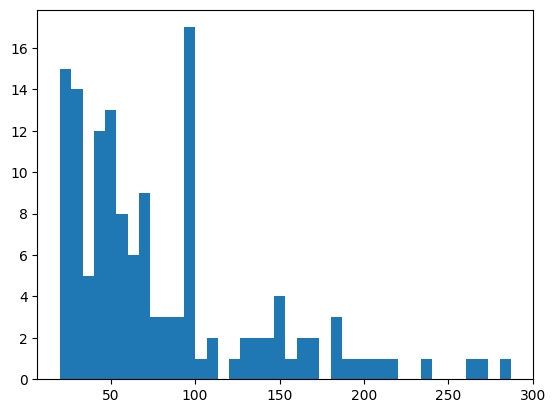

In [126]:
plt.hist(train[1].value_counts()[train[1].value_counts() < 300], bins=40)

In [127]:
train[1].value_counts().min()

20

В среднем приходится 50-70 примеров на уникальный тегов, минимум 20 уникальных примеров. Рассмотрим средние длин последовательностей по классам

(array([ 1.,  1.,  3.,  3.,  5., 11.,  8.,  9.,  9., 12., 15.,  6.,  9.,
         5.,  5.,  9.,  3.,  6.,  5.,  3.,  0.,  1.,  4.,  3.,  1.,  1.,
         1.,  1.,  1.,  1.]),
 array([12.11594203, 13.5983518 , 15.08076158, 16.56317136, 18.04558113,
        19.52799091, 21.01040068, 22.49281046, 23.97522023, 25.45763001,
        26.94003978, 28.42244956, 29.90485934, 31.38726911, 32.86967889,
        34.35208866, 35.83449844, 37.31690821, 38.79931799, 40.28172776,
        41.76413754, 43.24654731, 44.72895709, 46.21136687, 47.69377664,
        49.17618642, 50.65859619, 52.14100597, 53.62341574, 55.10582552,
        56.58823529]),
 <BarContainer object of 30 artists>)

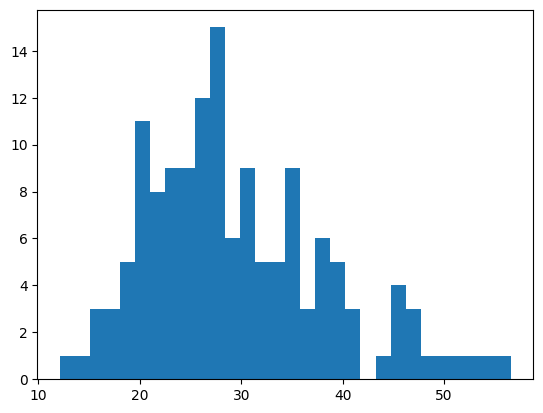

In [133]:
train["length"] = list(map(len, train[0]))
plt.hist(train.groupby(1).mean("length"), bins=30)

В среднем длины последовательностей составляют 35, все не превышают 60 и не меньше 10.

Посмотрим в файле с описанием, какие запросы встречаются

In [134]:
label_descriptions

['statement_general - get a document of some undefined type. \n',
 'incomestat - get an income statement\n',
 'conform - get a document that proofs that a person belongs to a university\n',
 'transcript - get a student transcript \n',
 'loc_cafeteria_new_building_general - find a cafe in building\n',
 'loc_cafeteria_new_building_1_etage - find a cafe in building (1 store)\n',
 'loc_cafeteria_new_building_2_etage - find a cafe in building (2 store)\n',
 'loc_cafeteria_new_building_3_etage - find a cafe in building (3 store)\n',
 'loc_cafeteria_new_building_4_etage - find a cafe in building (4 store)\n',
 'sched_general - get a schedule of classes\n',
 'sched_location - find a place where a schedule can be checked\n',
 'sched_exam - get a schedule of exams\n',
 'sched_rings\t- get a timetable of breaks and classes\n',
 'sched_teacher_how - how to get a schedule of a teacher\n',
 'lost_card_general - what to do if a card was lost\n',
 'studentcard_lost - what to do if a student card was l

Можем видеть как стандартные для университета запросы, вроде выдачи справок, поиска расписаний и экзаменов, так и поиски каких-то объектов в университете и рядом с университетом (кафетерии, моллы, библиотеки), а также разного рода вопросы ("Какая погода?", "Какое имя ректора?") и небольшие разговоры с ботом без какой-то цели. Можно заметить, что смысл тега частично можно получать из его названия (loc - найти что-то, smalltalk - разговор с ботом, sched - расписание чего-либо, и так далее). То есть, чтобы хорошо распознавать эти задачи модель должна быть хорошо знакома с подобного рода запросами

#### 1.Обучение базовой модели

In [167]:
np.random.seed(239)
unique_classes = np.unique(train[1])
class_to_label = {cls: label for label, cls in enumerate(np.random.choice(unique_classes, 142, replace=False))}

train["label"] = train[1].map(class_to_label)
test["label"] = test[1].map(class_to_label)

In [232]:
class CustomDatasetUniversity(torch.utils.data.Dataset):
    def __init__(self, data, tokenizer, max_length=64):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        encoding = self.tokenizer(
            row[0],
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt",
            add_special_tokens=True
        )
        return {
            "input_ids": encoding["input_ids"].flatten(),
            "attention_mask": encoding["attention_mask"].flatten(),
            "labels": torch.tensor(row["label"], dtype=torch.long)
        }

tokenizer = BertTokenizerFast.from_pretrained("DeepPavlov/rubert-base-cased")
train_dataset = CustomDatasetUniversity(train, tokenizer)
val_dataset = CustomDatasetUniversity(test, tokenizer)

In [178]:
def compute_metrics_uni(p: EvalPrediction):
    logits, label_ids = p

    predictions = logits.argmax(-1)
    y_pred = predictions
    y_true = label_ids

    f1_0 = f1_score(y_true == 0, y_pred == 0)
    f1_2 = f1_score(y_true == 2, y_pred == 2)

    f1_avg = (f1_0 + f1_2) / 2

    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision_macro": precision_score(y_true, y_pred, average='macro'),
        "recall_macro": recall_score(y_true, y_pred, average='macro'),
        "f1_macro": f1_score(y_true, y_pred, average='macro'),
    }

In [179]:
model = BertForSequenceClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased", num_labels=len(np.unique(train[1]))
)

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=15e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics_uni,
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro
1,No log,2.953685,0.570781,0.299426,0.311803,0.280491
2,No log,1.899394,0.756512,0.540716,0.558240,0.530039
3,3.001700,1.370313,0.838052,0.639846,0.670849,0.641077
4,3.001700,1.123212,0.886750,0.770650,0.785821,0.768054
5,1.359600,1.048912,0.901472,0.832574,0.814623,0.805666


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead 

TrainOutput(global_step=1035, training_loss=2.1469326443142362, metrics={'train_runtime': 587.7992, 'train_samples_per_second': 112.538, 'train_steps_per_second': 1.761, 'total_flos': 2178334275264000.0, 'train_loss': 2.1469326443142362, 'epoch': 5.0})

Нам удалось достигнуть точности в $90\%$ и $0.81F_1$ score. Это достаточно неплохой результат для базовой модели, учитывая, насколько большое количество уникальных классов, и что некоторые из них очень друг на друга похожи, что не учитывается в метрике

#### 2.Дообучение модели

In [201]:
train_old = train[train["label"] < 122]
train_new = train[train["label"] > 121]

test_old = test[test["label"] < 122]
test_new = test[test["label"] > 121]

train_dataset_old = CustomDatasetUniversity(train_old, tokenizer)
val_dataset_old = CustomDatasetUniversity(test_old, tokenizer)

train_dataset_new = CustomDatasetUniversity(train_new, tokenizer)
val_dataset_new = CustomDatasetUniversity(test_new, tokenizer)

In [181]:
model = BertForSequenceClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased", num_labels=122
)

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=15e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_old,
    eval_dataset=val_dataset_old,
    compute_metrics=compute_metrics_uni,
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro
1,No log,2.784365,0.600512,0.301191,0.323274,0.284326
2,No log,1.758384,0.786172,0.561915,0.579070,0.549643
3,2.682600,1.264721,0.856594,0.703133,0.713459,0.692066
4,2.682600,1.044558,0.880922,0.777272,0.772688,0.758352
5,2.682600,0.979764,0.888604,0.796614,0.784081,0.775149


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead 

TrainOutput(global_step=915, training_loss=2.0145661234204235, metrics={'train_runtime': 516.2752, 'train_samples_per_second': 112.847, 'train_steps_per_second': 1.772, 'total_flos': 1918170734054400.0, 'train_loss': 2.0145661234204235, 'epoch': 5.0})

In [182]:
hidden_size = model.config.hidden_size

new_classifier = nn.Linear(hidden_size, 142)

with torch.no_grad():
    new_classifier.weight[:122] = model.classifier.weight
    new_classifier.bias[:122] = model.classifier.bias

nn.init.xavier_uniform_(new_classifier.weight[122:])
nn.init.zeros_(new_classifier.bias[122:])

model.classifier = new_classifier

In [206]:
model.num_labels = 142
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [189]:
for param in model.bert.parameters():
    param.requires_grad = False

for param in model.dropout.parameters():
    param.requires_grad = False

In [233]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=15e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics_uni,
)

trainer.train()

/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro
1,No log,1.265322,0.796149,0.656530,0.696716,0.657133
2,No log,1.181999,0.795017,0.664373,0.698506,0.663070
3,1.351200,1.127356,0.798414,0.666217,0.705117,0.668242
4,1.351200,1.096356,0.800680,0.674115,0.711803,0.675683
5,1.195600,1.086407,0.801812,0.677970,0.712817,0.677450


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead 

TrainOutput(global_step=1035, training_loss=1.2704971276619583, metrics={'train_runtime': 306.8809, 'train_samples_per_second': 215.556, 'train_steps_per_second': 3.373, 'total_flos': 2178334275264000.0, 'train_loss': 1.2704971276619583, 'epoch': 5.0})

Видим, что даже без оптимизации с хранением последнего слоя модель учится в 2 раза быстрее. Однако по качеству модель оказалась хуже, потому берт не дообучался на новых классов, а делал feature extracting, релевантный для первых 122 классов. Потеря и в точности, и в $F_1$ оказалась достаточно серьезной

#### 3. Эксперименты

In [257]:
class MLPHead(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_dim, input_dim // 2),
            nn.ReLU(),
            nn.LayerNorm(input_dim // 2),
            nn.Linear(input_dim // 2, num_classes)
        )

    def forward(self, inputs_embeds):
        return self.classifier(inputs_embeds)

In [259]:
model = BertForSequenceClassification.from_pretrained(
    "DeepPavlov/rubert-base-cased", num_labels=122
)

model.classifier = MLPHead(input_dim=768, num_classes=142)
model.num_labels = 142

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=15e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    report_to="none"
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics_uni,
)

trainer.train()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/rubert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro
1,No log,1.545936,0.776897,0.630371,0.620645,0.600110
2,No log,0.586971,0.907135,0.868510,0.851036,0.848332
3,1.980100,0.306414,0.946772,0.934190,0.931535,0.929572
4,1.980100,0.222158,0.950170,0.944710,0.940214,0.938927
5,0.385100,0.202084,0.954700,0.946296,0.947011,0.942876


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead 

TrainOutput(global_step=1035, training_loss=1.1523022969563803, metrics={'train_runtime': 590.0264, 'train_samples_per_second': 112.114, 'train_steps_per_second': 1.754, 'total_flos': 2184469676121600.0, 'train_loss': 1.1523022969563803, 'epoch': 5.0})

Получили то же время обучения, но качество намного выше!

#### 4. Выводы

Модель из второго пункта оказалась значительно хуже первой модели. Преимущество второй модели - скорость, недостаток - качество. Это может попробовать исправить PEFT-методами, необходимыми для дообучения BERT

In [234]:
!pip install peft

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 14.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-

In [235]:
from peft import LoraConfig, get_peft_model

In [236]:
lora_config = LoraConfig(
    r=8,  # ранг матрицы LoRA
    lora_alpha=16,  # коэффициент масштабирования
    lora_dropout=0.1,  # dropout для LoRA
    bias="none",  # не добавлять bias при адаптации
    task_type="SEQ_CLS",  # тип задачи: последовательная классификация
    target_modules=["query", "value"]  # слои, к которым применяется LoRA
)

model = get_peft_model(model, lora_config)

In [237]:
def print_trainable_parameters(model):
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    total_params = sum(p.numel() for p in model.parameters())
    print(f"Обучаемые параметры: {trainable_params} | Всего параметров: {total_params} | % обучаемых: {100 * trainable_params / total_params:.2f}%")

print_trainable_parameters(model)

Обучаемые параметры: 404110 | Всего параметров: 178366748 | % обучаемых: 0.23%


In [238]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=15e-6,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=5,
    weight_decay=0.01,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics_uni,
)

trainer.train()

No label_names provided for model class `PeftModelForSequenceClassification`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision Macro,Recall Macro,F1 Macro
1,No log,0.987089,0.804077,0.669052,0.714228,0.675234
2,No log,0.912342,0.822197,0.678086,0.720974,0.683805
3,1.064800,0.864700,0.825595,0.687970,0.728946,0.694895
4,1.064800,0.838685,0.830125,0.697270,0.736629,0.703387
5,0.937800,0.830275,0.832390,0.698336,0.738824,0.704732


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/torch/nn/parallel/_functions.py:70: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead 

TrainOutput(global_step=1035, training_loss=0.9989216164114395, metrics={'train_runtime': 439.348, 'train_samples_per_second': 150.564, 'train_steps_per_second': 2.356, 'total_flos': 2188599315840000.0, 'train_loss': 0.9989216164114395, 'epoch': 5.0})

Видим, что мы немного потеряли в скорости, зато вернули часть качества первой модели. Среди всех моделей оптимальной является модель с MLPHead в качестве классификатора